In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.cm import get_cmap
from matplotlib.colors import Normalize
import os
import torch
from os.path import join
import json
import seaborn as sns
c = 'coral'
c1 = 'yellowgreen'
base_c = 'aqua'


plt.rcParams['text.usetex'] = False
sns.set(style="ticks")
plt.rc('font', family='serif')
plt.rc('font', serif='Times New Roman')

yaxisfont=45
bigfont = 27 + 5
medfont = 20 + 5
smallfont = 17

plt.rcParams['xtick.labelsize']=medfont
plt.rcParams['ytick.labelsize']=medfont

sns.set_style('ticks', {'font.family':'serif', 'font.serif':'Times New Roman', 'font.size': 16})

sns.set_palette("muted")
from collections import defaultdict
ticks_fontsize = 18
label_fontsize = 20
cbar_fontsize = 18
sns.set_style('ticks', {'font.family':'serif', 'font.serif':'Times New Roman', 'font.size': 16})

import powerlaw
import warnings



In [28]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [36]:
def parse_log_adah(path):
    with open(path, 'r') as f:
        lines = f.readlines()

        val_nll_loss_lst = []
        val_loss_lst = []
        train_nll_loss_lst = []
        train_loss_lst  = []
        for l in lines:
            if '| wall' in l and '| loss' in l:
                loss_index = l.find('loss')
                nll_loss_index = l.find('nll_loss')

                train_loss_lst.append(float(l[loss_index+5:].split(' ')[0]))
                train_nll_loss_lst.append(float(l[nll_loss_index+9:].split(' ')[0]))

            if '| valid on' in l:
                loss_index = l.find(' loss ')
                nll_loss_index = l.find(' nll_loss ')


                val_loss_lst.append(float(l[loss_index+6:].split(' ')[0]))
                val_nll_loss_lst.append(float(l[nll_loss_index+10:].split(' ')[0]))

    return val_nll_loss_lst, val_loss_lst, train_nll_loss_lst, train_loss_lst

BLEU SCORE:  [1.6, 0.37, 0.0, 0.05, 0.0]


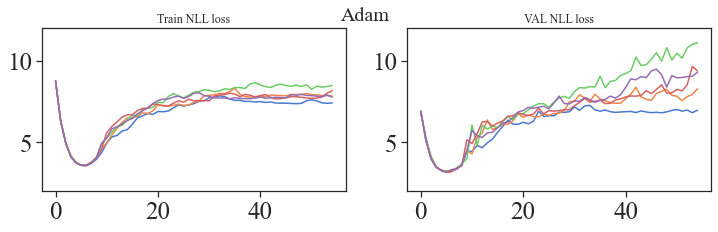

In [40]:
base="/home/eecs/yefan0726/ww_train_repos/adahessian/logs/adahessian/adam"
plt.figure(figsize=(12, 3))

bleu_lst = []
for seed in [43, 13, 37, 51, 71]:
    train_txt = f"{base}/transformer_iwslt_de_en_v2_iwslt14_de_en_seed{seed}/train_log.txt"

    val_nll_loss_lst, val_loss_lst, train_nll_loss_lst, train_loss_lst = parse_log_adah(train_txt)

    plt.suptitle("Adam", fontsize=20)
    plt.subplot(1, 2, 1)
    plt.plot(train_nll_loss_lst)
    plt.title("Train NLL loss")
    plt.ylim([2, 12])

    plt.subplot(1, 2, 2)
    plt.plot(val_nll_loss_lst)
    plt.title("VAL NLL loss")
    plt.ylim([2, 12])

    with open(f"{base}/transformer_iwslt_de_en_v2_iwslt14_de_en_seed{seed}/trans/res.txt", 'r') as f:
        lines = f.readlines()
        index = lines[-1].find('BLEU4')
        bleu_lst.append(float(lines[-1][index+8:].split(' ')[0][:-1]))

print("BLEU SCORE: ", bleu_lst)

BLEU SCORE:  [34.67, 34.79, 34.8, 34.64, 34.89]


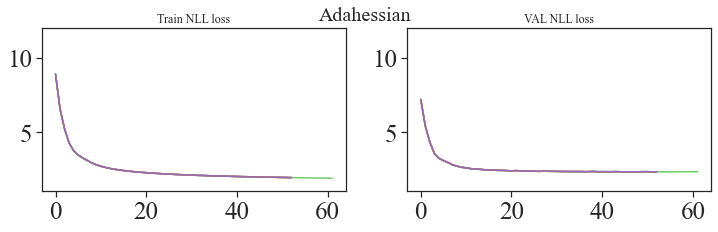

In [42]:
base="/home/eecs/yefan0726/ww_train_repos/adahessian/logs/adahessian/adahessian"
plt.figure(figsize=(12, 3))
bleu_lst = []
for seed in [43, 13, 37, 51, 71]:
    train_txt = f"{base}/transformer_iwslt_de_en_v2_iwslt14_de_en_seed{seed}/train_log.txt"
    val_nll_loss_lst, val_loss_lst, train_nll_loss_lst, train_loss_lst = parse_log_adah(train_txt)
    plt.suptitle("Adahessian", fontsize=20)
    plt.subplot(1, 2, 1)
    plt.plot(train_nll_loss_lst)
    plt.ylim([1, 12])
    plt.title("Train NLL loss")

    plt.subplot(1, 2, 2)
    plt.plot(val_nll_loss_lst)
    plt.ylim([1, 12])
    plt.title("VAL NLL loss")

    with open(f"{base}/transformer_iwslt_de_en_v2_iwslt14_de_en_seed{seed}/trans/res.txt", 'r') as f:
        lines = f.readlines()
        index = lines[-1].find('BLEU4')
        bleu_lst.append(float(lines[-1][index+8:].split(' ')[0][:-1]))

print("BLEU SCORE: ", bleu_lst)